<a href="https://colab.research.google.com/github/sarikamohan08/CIFAR10/blob/main/CIFAR_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [5]:

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

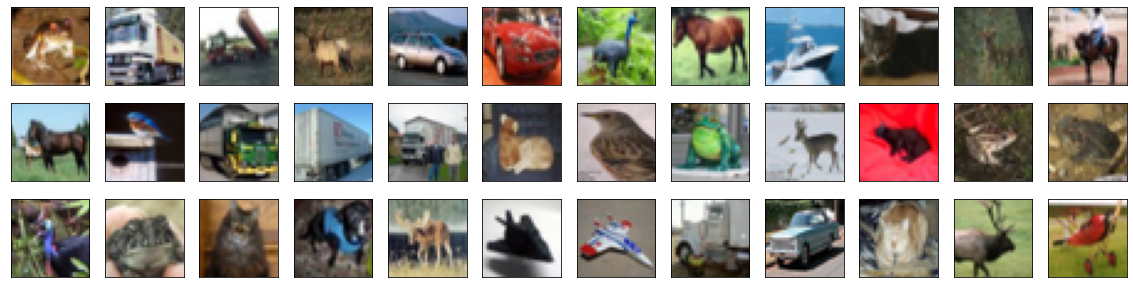

In [6]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
print(tf.__version__)

2.5.0


In [9]:
#import tensorflow
#from tensorflow.keras.utils import np_utils 
#from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


# MODEL 1

In [51]:
from keras.layers.advanced_activations import LeakyReLU
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 3)))
model1.add(LeakyReLU(0.1))
model1.add(Conv2D(filters=16, kernel_size=3,padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32, kernel_size=(3,3),padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3),padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same"))
model1.add(LeakyReLU(0.1))

model1.add(Flatten())
model1.add(Dense(500))
model1.add(LeakyReLU(0.1))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 16, 16, 32)      

In [52]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [53]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), 
          verbose=2, shuffle=True)

Epoch 1/20
1407/1407 - 13s - loss: 1.7290 - accuracy: 0.3471 - val_loss: 1.3691 - val_accuracy: 0.4948
Epoch 2/20
1407/1407 - 12s - loss: 1.2570 - accuracy: 0.5449 - val_loss: 1.3016 - val_accuracy: 0.5508
Epoch 3/20
1407/1407 - 12s - loss: 1.0255 - accuracy: 0.6378 - val_loss: 1.1240 - val_accuracy: 0.6040
Epoch 4/20
1407/1407 - 12s - loss: 0.8804 - accuracy: 0.6943 - val_loss: 1.4090 - val_accuracy: 0.5504
Epoch 5/20
1407/1407 - 11s - loss: 0.7889 - accuracy: 0.7310 - val_loss: 0.9377 - val_accuracy: 0.6828
Epoch 6/20
1407/1407 - 12s - loss: 0.7266 - accuracy: 0.7515 - val_loss: 0.8717 - val_accuracy: 0.7024
Epoch 7/20
1407/1407 - 12s - loss: 0.6757 - accuracy: 0.7701 - val_loss: 0.9038 - val_accuracy: 0.6956
Epoch 8/20
1407/1407 - 11s - loss: 0.6284 - accuracy: 0.7870 - val_loss: 0.8866 - val_accuracy: 0.7160
Epoch 9/20
1407/1407 - 12s - loss: 0.5953 - accuracy: 0.8008 - val_loss: 0.8322 - val_accuracy: 0.7296
Epoch 10/20
1407/1407 - 12s - loss: 0.5740 - accuracy: 0.8070 - val_loss:

In [54]:
history1.params

{'epochs': 20, 'steps': 1407, 'verbose': 2}

In [55]:
pd.DataFrame(history1.history)

,loss,accuracy,val_loss,val_accuracy
0,1.728985,0.347067,1.369051,0.4948
1,1.256954,0.544889,1.301637,0.5508
2,1.025543,0.637778,1.123959,0.6040
3,0.880370,0.694289,1.409029,0.5504
4,0.788917,0.731044,0.937652,0.6828
5,0.726635,0.751533,0.871653,0.7024
6,0.675747,0.770089,0.903769,0.6956
7,0.628356,0.786956,0.886604,0.7160
8,0.595272,0.800756,0.832236,0.7296
9,0.574039,0.806956,0.940115,0.7102


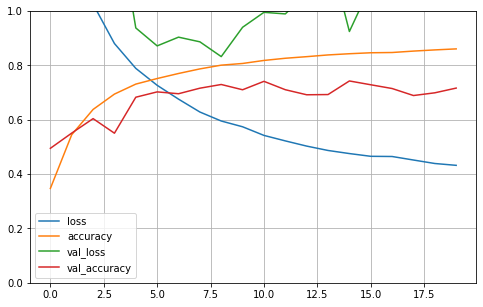

In [56]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
score = model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.4284 - accuracy: 0.7056


In [58]:

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

accuracy1 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy1)

Test Loss: 1.4284443855285645
Test accuracy: 0.7056000232696533
Test accuracy: 70.5600%


# MODEL 2

In [37]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(3,3), padding="same",activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(filters=16, kernel_size=3,padding="same", activation='relu' ))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",  activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))

model2.add(Flatten())
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 4, 4, 64)        

In [38]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [39]:
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), 
          verbose=2, shuffle=True)

Epoch 1/20
1407/1407 - 42s - loss: 1.7585 - accuracy: 0.3347 - val_loss: 1.5575 - val_accuracy: 0.4110
Epoch 2/20
1407/1407 - 11s - loss: 1.2667 - accuracy: 0.5413 - val_loss: 1.2527 - val_accuracy: 0.5536
Epoch 3/20
1407/1407 - 11s - loss: 1.0605 - accuracy: 0.6250 - val_loss: 1.0611 - val_accuracy: 0.6280
Epoch 4/20
1407/1407 - 11s - loss: 0.9416 - accuracy: 0.6696 - val_loss: 0.9387 - val_accuracy: 0.6718
Epoch 5/20
1407/1407 - 11s - loss: 0.8686 - accuracy: 0.6984 - val_loss: 0.9912 - val_accuracy: 0.6722
Epoch 6/20
1407/1407 - 11s - loss: 0.8246 - accuracy: 0.7198 - val_loss: 1.0127 - val_accuracy: 0.6732
Epoch 7/20
1407/1407 - 11s - loss: 0.7991 - accuracy: 0.7346 - val_loss: 0.9879 - val_accuracy: 0.6714
Epoch 8/20
1407/1407 - 11s - loss: 0.8014 - accuracy: 0.7337 - val_loss: 1.1326 - val_accuracy: 0.6750
Epoch 9/20
1407/1407 - 11s - loss: 0.7859 - accuracy: 0.7413 - val_loss: 1.0021 - val_accuracy: 0.6794
Epoch 10/20
1407/1407 - 11s - loss: 0.7845 - accuracy: 0.7449 - val_loss:

In [40]:
history2.params

{'epochs': 20, 'steps': 1407, 'verbose': 2}

In [41]:
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,1.758457,0.334711,1.557462,0.4110
1,1.266694,0.541333,1.252749,0.5536
2,1.060544,0.625022,1.061134,0.6280
3,0.941561,0.669578,0.938676,0.6718
4,0.868611,0.698356,0.991216,0.6722
5,0.824619,0.719756,1.012683,0.6732
6,0.799124,0.734556,0.987923,0.6714
7,0.801390,0.733711,1.132601,0.6750
8,0.785889,0.741311,1.002137,0.6794
9,0.784527,0.744867,1.482786,0.6220


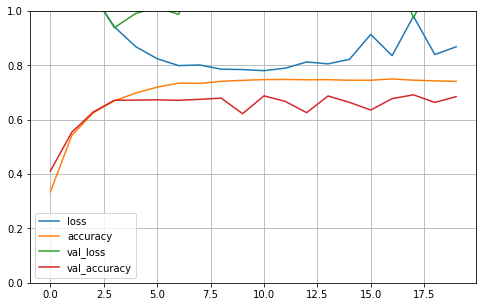

In [42]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:

score = model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 4.5545 - accuracy: 0.6767


In [45]:

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

accuracy2 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy2)

Test Loss: 4.554487705230713
Test accuracy: 0.6766999959945679
Test accuracy: 67.6700%


# MODEL 3

In [59]:
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=(3,3), padding="same",activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(filters=16, kernel_size=3,padding="same", activation='relu' ))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",  activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))
model3.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))
model3.add(Flatten())
model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 4, 4, 64)        

In [67]:
model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [68]:
history3 = model3.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), 
          verbose=2, shuffle=True)

Epoch 1/20
1407/1407 - 11s - loss: 0.9729 - accuracy: 0.6849 - val_loss: 0.9721 - val_accuracy: 0.7054
Epoch 2/20
1407/1407 - 10s - loss: 0.7250 - accuracy: 0.7660 - val_loss: 0.8996 - val_accuracy: 0.7216
Epoch 3/20
1407/1407 - 10s - loss: 0.9461 - accuracy: 0.6774 - val_loss: 1.0121 - val_accuracy: 0.6704
Epoch 4/20
1407/1407 - 10s - loss: 0.6955 - accuracy: 0.7731 - val_loss: 0.8534 - val_accuracy: 0.7310
Epoch 5/20
1407/1407 - 10s - loss: 0.6197 - accuracy: 0.7985 - val_loss: 0.8368 - val_accuracy: 0.7398
Epoch 6/20
1407/1407 - 10s - loss: 0.6616 - accuracy: 0.7833 - val_loss: 0.8350 - val_accuracy: 0.7438
Epoch 7/20
1407/1407 - 10s - loss: 0.7268 - accuracy: 0.7612 - val_loss: 1.4249 - val_accuracy: 0.4936
Epoch 8/20
1407/1407 - 10s - loss: 0.5961 - accuracy: 0.8018 - val_loss: 0.8888 - val_accuracy: 0.7354
Epoch 9/20
1407/1407 - 10s - loss: 0.5490 - accuracy: 0.8204 - val_loss: 0.8418 - val_accuracy: 0.7416
Epoch 10/20
1407/1407 - 10s - loss: 0.5179 - accuracy: 0.8295 - val_loss:

In [76]:
history3.params

{'epochs': 20, 'steps': 1407, 'verbose': 2}

In [77]:
pd.DataFrame(history3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.972942,0.684889,0.972145,0.7054
1,0.724972,0.766022,0.899636,0.7216
2,0.946092,0.677400,1.012124,0.6704
3,0.695546,0.773111,0.853355,0.7310
4,0.619709,0.798511,0.836802,0.7398
5,0.661605,0.783333,0.835032,0.7438
6,0.726843,0.761244,1.424924,0.4936
7,0.596098,0.801778,0.888842,0.7354
8,0.548950,0.820400,0.841795,0.7416
9,0.517896,0.829467,1.122121,0.7482


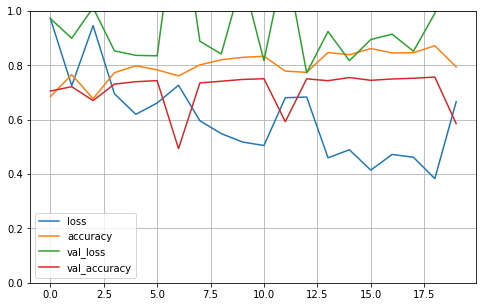

In [78]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [79]:

score = model3.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2501 - accuracy: 0.5752


In [80]:

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

accuracy3 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy3)

Test Loss: 1.2500959634780884
Test accuracy: 0.5752000212669373
Test accuracy: 57.5200%


# MODEL 4

In [10]:
model4 = Sequential()
model4.add(Conv2D(filters=16, kernel_size=(5,5), padding="same",activation='relu', input_shape=(32, 32, 3)))
model4.add(Conv2D(filters=16, kernel_size=(5,5),padding="same", activation='relu' ))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=32, kernel_size=(5,5),padding="same", activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=64, kernel_size=(5,5),padding="same",  activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=64, kernel_size=(5,5), padding="same", activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=64, kernel_size=(5,5), padding="same", activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=64, kernel_size=(5,5),  padding="same",activation='relu'))
model4.add(Conv2D(filters=64, kernel_size=(5,5),  padding="same",activation='relu'))
model4.add(Flatten())
model4.add(Dense(500, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0

In [11]:
model4.compile(loss='categorical_crossentropy', optimizer='Rmsprop', metrics=['accuracy'])

In [12]:
history4 = model4.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), 
          verbose=2, shuffle=True)

Epoch 1/20
1407/1407 - 47s - loss: 1.9168 - accuracy: 0.2507 - val_loss: 1.8287 - val_accuracy: 0.3356
Epoch 2/20
1407/1407 - 16s - loss: 1.5104 - accuracy: 0.4410 - val_loss: 1.5489 - val_accuracy: 0.4394
Epoch 3/20
1407/1407 - 16s - loss: 1.2850 - accuracy: 0.5445 - val_loss: 1.4579 - val_accuracy: 0.4738
Epoch 4/20
1407/1407 - 17s - loss: 1.1435 - accuracy: 0.5997 - val_loss: 1.2047 - val_accuracy: 0.5886
Epoch 5/20
1407/1407 - 16s - loss: 1.0614 - accuracy: 0.6302 - val_loss: 1.2378 - val_accuracy: 0.5634
Epoch 6/20
1407/1407 - 16s - loss: 1.0258 - accuracy: 0.6509 - val_loss: 1.1685 - val_accuracy: 0.6026
Epoch 7/20
1407/1407 - 16s - loss: 1.0004 - accuracy: 0.6660 - val_loss: 1.6232 - val_accuracy: 0.5442
Epoch 8/20
1407/1407 - 16s - loss: 1.0272 - accuracy: 0.6683 - val_loss: 1.6873 - val_accuracy: 0.5390
Epoch 9/20
1407/1407 - 16s - loss: 1.0053 - accuracy: 0.6726 - val_loss: 1.0758 - val_accuracy: 0.6492
Epoch 10/20
1407/1407 - 16s - loss: 0.9883 - accuracy: 0.6786 - val_loss:

In [14]:
history4.params

{'epochs': 20, 'steps': 1407, 'verbose': 2}

In [15]:
pd.DataFrame(history4.history)

,loss,accuracy,val_loss,val_accuracy
0,1.916803,0.250711,1.828743,0.3356
1,1.510394,0.440978,1.548938,0.4394
2,1.285018,0.544533,1.457900,0.4738
3,1.143495,0.599667,1.204675,0.5886
4,1.061393,0.630222,1.237796,0.5634
5,1.025849,0.650867,1.168530,0.6026
6,1.000352,0.666044,1.623232,0.5442
7,1.027247,0.668311,1.687311,0.5390
8,1.005290,0.672622,1.075782,0.6492
9,0.988318,0.678556,1.581211,0.5938


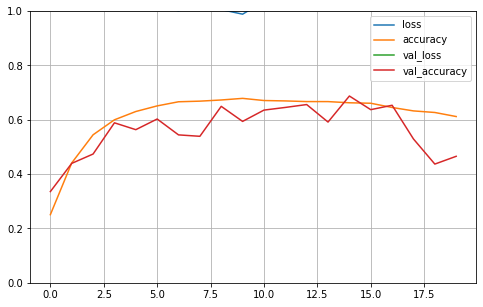

In [16]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
score = model4.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 2.1716 - accuracy: 0.4615


In [18]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

accuracy4 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy4)

Test Loss: 2.1716365814208984
Test accuracy: 0.46149998903274536
Test accuracy: 46.1500%


# MODEL 5

In [23]:
model5 = Sequential()
model5.add(Conv2D(filters=16, kernel_size=(3,3), padding="same",activation='relu', input_shape=(32, 32, 3)))
model5.add(Conv2D(filters=16, kernel_size=3,padding="same", activation='relu' ))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu'))
model5.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",  activation='relu'))
model5.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model5.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))
model5.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same",activation='relu'))
model5.add(Flatten())
model5.add(Dense(1024, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)         

In [24]:
model5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [25]:
history5 = model5.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), 
          verbose=2, shuffle=True)

Epoch 1/20
1407/1407 - 19s - loss: 1.9677 - accuracy: 0.2142 - val_loss: 1.7551 - val_accuracy: 0.2990
Epoch 2/20
1407/1407 - 17s - loss: 1.6147 - accuracy: 0.3723 - val_loss: 1.4601 - val_accuracy: 0.4428
Epoch 3/20
1407/1407 - 17s - loss: 1.4002 - accuracy: 0.4806 - val_loss: 1.3231 - val_accuracy: 0.5096
Epoch 4/20
1407/1407 - 17s - loss: 1.2399 - accuracy: 0.5528 - val_loss: 1.1493 - val_accuracy: 0.5848
Epoch 5/20
1407/1407 - 17s - loss: 1.1254 - accuracy: 0.6014 - val_loss: 1.0509 - val_accuracy: 0.6270
Epoch 6/20
1407/1407 - 17s - loss: 1.0418 - accuracy: 0.6341 - val_loss: 1.0308 - val_accuracy: 0.6428
Epoch 7/20
1407/1407 - 17s - loss: 0.9672 - accuracy: 0.6628 - val_loss: 1.0498 - val_accuracy: 0.6366
Epoch 8/20
1407/1407 - 17s - loss: 0.9115 - accuracy: 0.6844 - val_loss: 0.9764 - val_accuracy: 0.6626
Epoch 9/20
1407/1407 - 17s - loss: 0.8676 - accuracy: 0.7002 - val_loss: 0.9417 - val_accuracy: 0.6788
Epoch 10/20
1407/1407 - 17s - loss: 0.8210 - accuracy: 0.7159 - val_loss:

In [26]:
history5.params

{'epochs': 20, 'steps': 1407, 'verbose': 2}

In [27]:
pd.DataFrame(history5.history)

,loss,accuracy,val_loss,val_accuracy
0,1.967673,0.214200,1.755062,0.2990
1,1.614742,0.372289,1.460115,0.4428
2,1.400240,0.480578,1.323132,0.5096
3,1.239911,0.552778,1.149337,0.5848
4,1.125412,0.601378,1.050944,0.6270
5,1.041791,0.634133,1.030793,0.6428
6,0.967158,0.662778,1.049848,0.6366
7,0.911452,0.684422,0.976443,0.6626
8,0.867569,0.700156,0.941673,0.6788
9,0.821031,0.715889,0.949056,0.6862


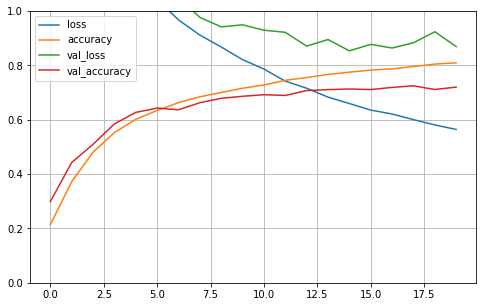

In [28]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
score = model5.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8809 - accuracy: 0.7160


In [31]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

accuracy5 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy5)

Test Loss: 0.8808587789535522
Test accuracy: 0.7160000205039978
Test accuracy: 71.6000%


# COMPARISON CHART

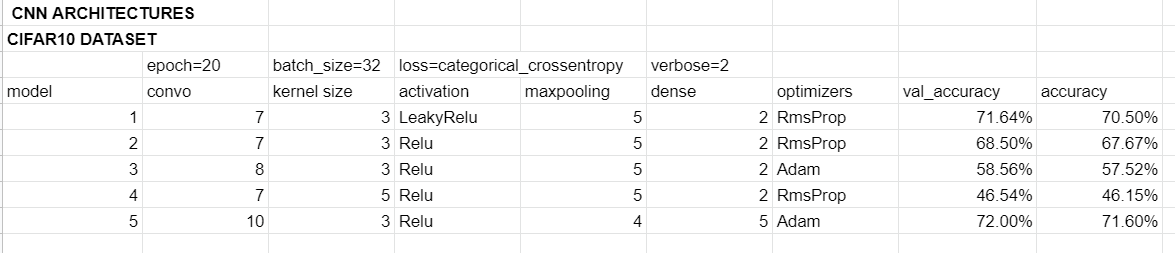